In [3]:
!pip install pandas-datareader

In [345]:
#import the libraries
import math
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [347]:
import pandas_datareader.data as web
from datetime import datetime

#set the starting and end date of  data
start_date = datetime(2010, 1, 1)
end_date = datetime(2024, 10, 10)

#Load the data from yahoo finance
stock_data = web.DataReader('AAPL', 'stooq', start=start_date, end=end_date)

#print first and last five columns of the dataset
print("Latest data\n")
print(stock_data.head(5),"\n")
print("Last data\n")
print(stock_data.tail(5))
# Get the number of rows and columns in the dataset
print(stock_data.shape)

Latest data

              Open    High     Low   Close      Volume
Date                                                  
2024-10-10  227.78  229.50  227.17  229.04  28183544.0
2024-10-09  225.23  229.75  224.83  229.54  33591091.0
2024-10-08  224.30  225.98  223.25  225.77  31855693.0
2024-10-07  224.50  225.69  221.33  221.69  39505354.0
2024-10-04  227.90  228.00  224.13  226.80  37345098.0 

Last data

               Open     High      Low    Close        Volume
Date                                                        
2010-01-08  6.34617  6.39407  6.30527  6.39387  5.296205e+08
2010-01-07  6.38439  6.39407  6.30478  6.35113  5.641458e+08
2010-01-06  6.46558  6.49137  6.35574  6.36237  6.513684e+08
2010-01-05  6.47811  6.50241  6.43181  6.46558  7.121486e+08
2010-01-04  6.43902  6.46922  6.40573  6.45451  5.819111e+08
(3718, 5)


In [349]:
#Data preprocessing
#Find the missing values in the dataset
print("Total missing Values in the stock market dataset:",stock_data.isna().sum().sum())
#find the Duplicate data in the dataset
print("No.of duplicate in train datasets:",end=" ")
print(stock_data.duplicated().sum())

Total missing Values in the stock market dataset: 0
No.of duplicate in train datasets: 0


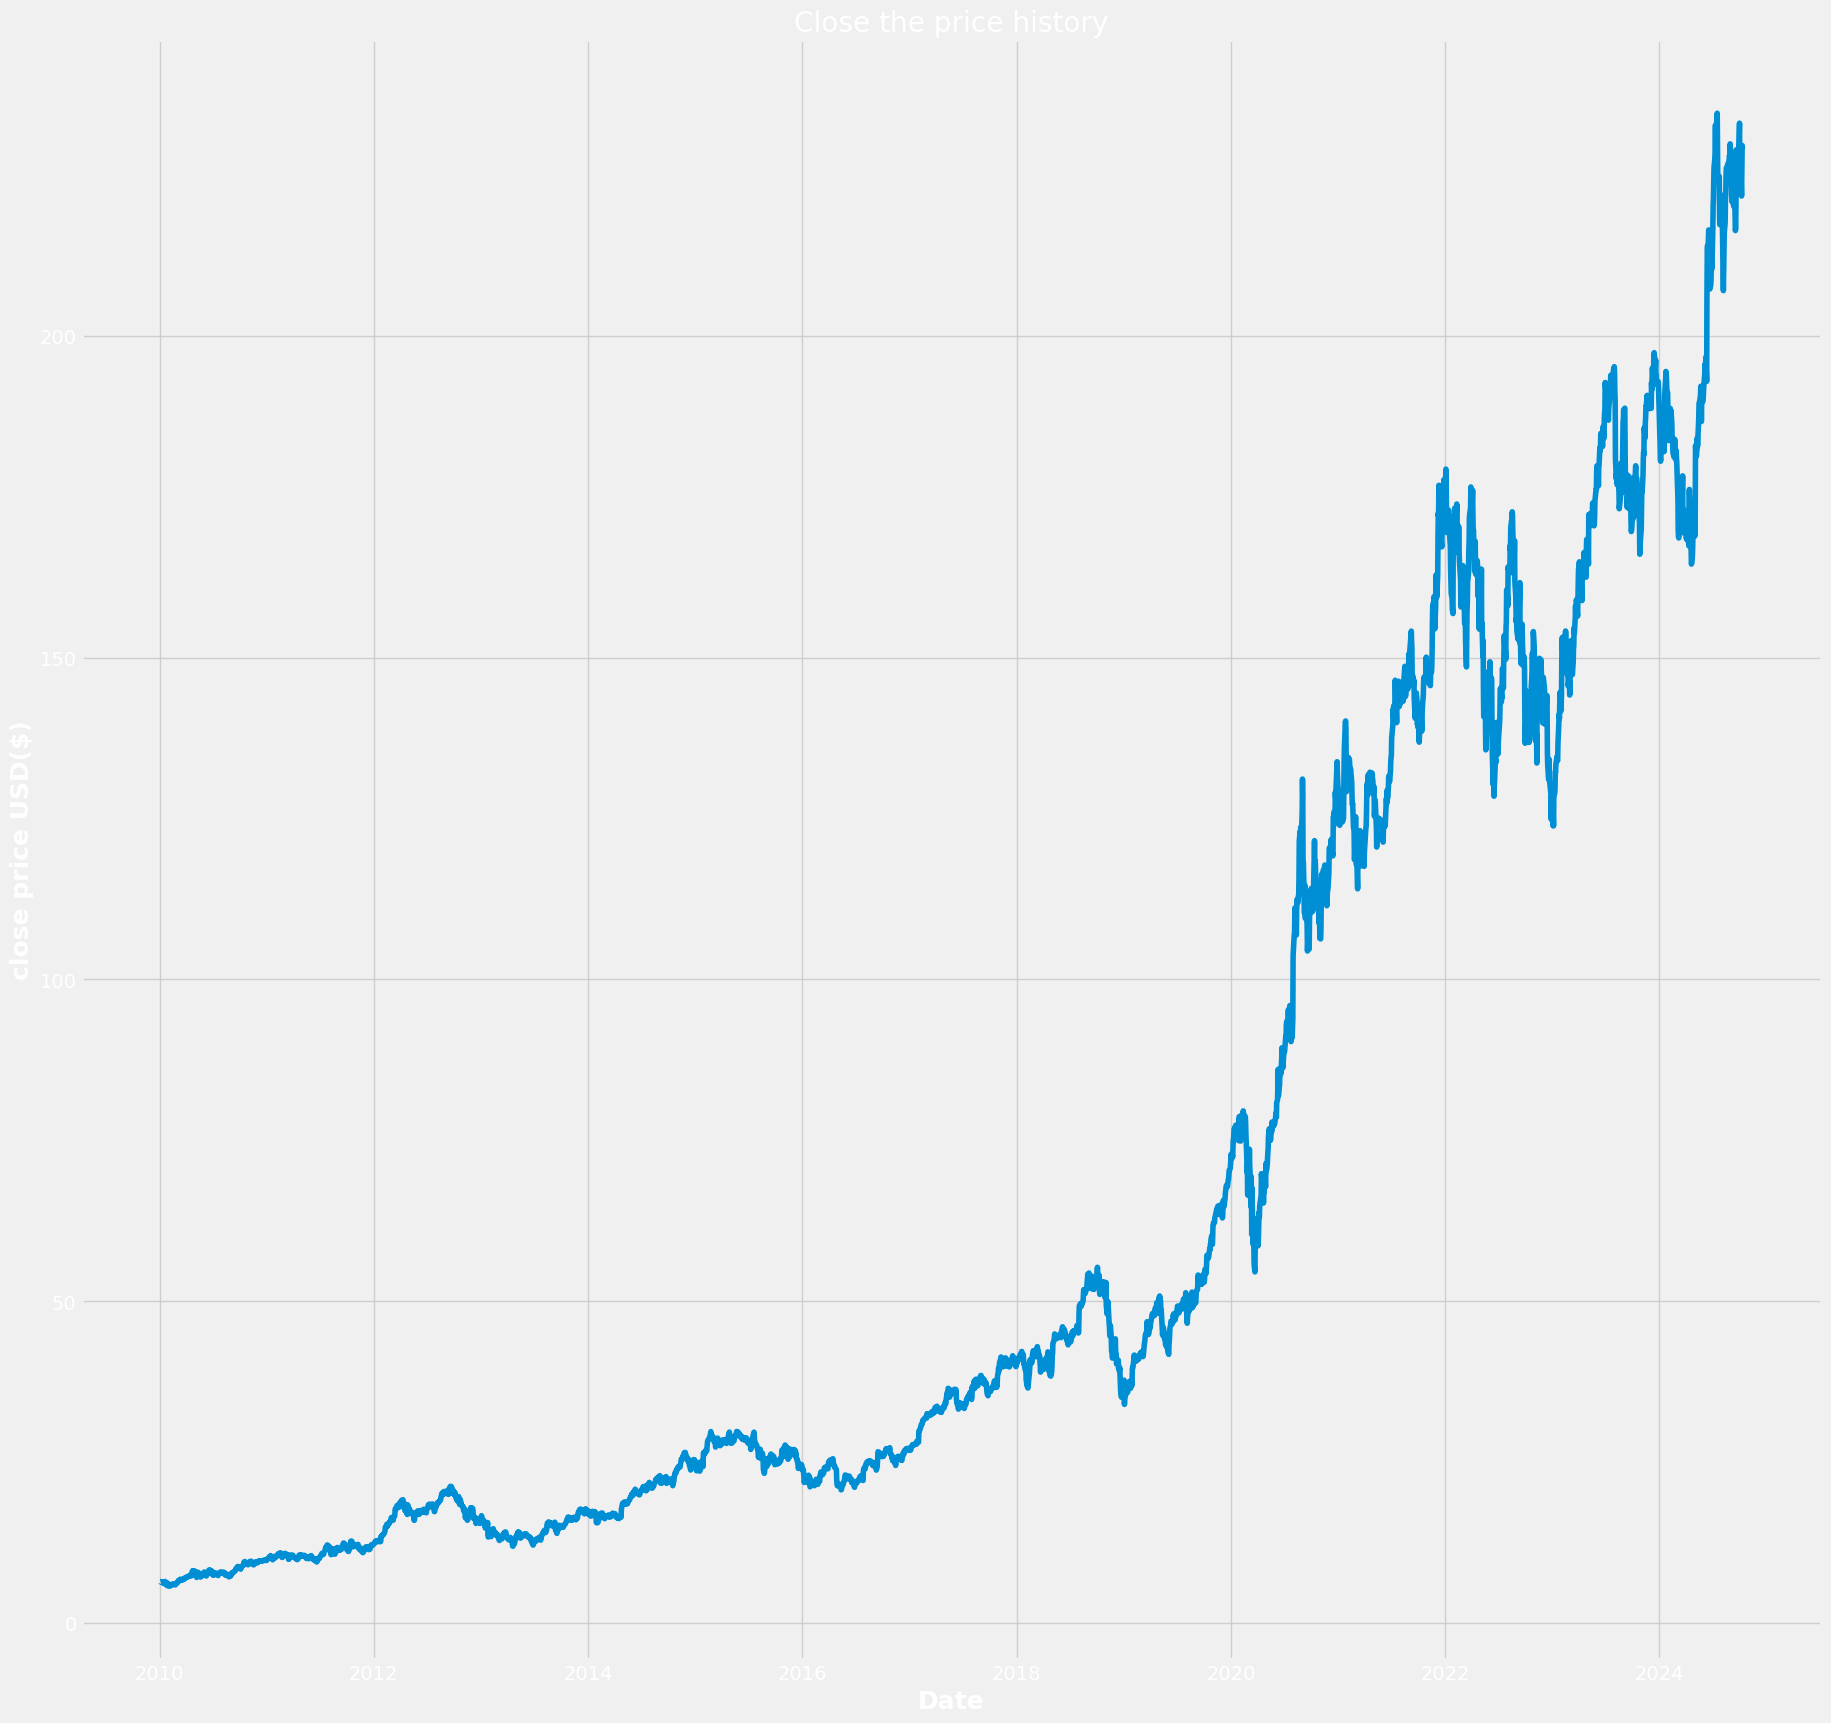

In [353]:
#visualize the closing price history
plt.figure(figsize=(20,20))
plt.title("Close the price history")
plt.plot(stock_data.index,stock_data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("close price USD($)",fontsize=18)
plt.show()

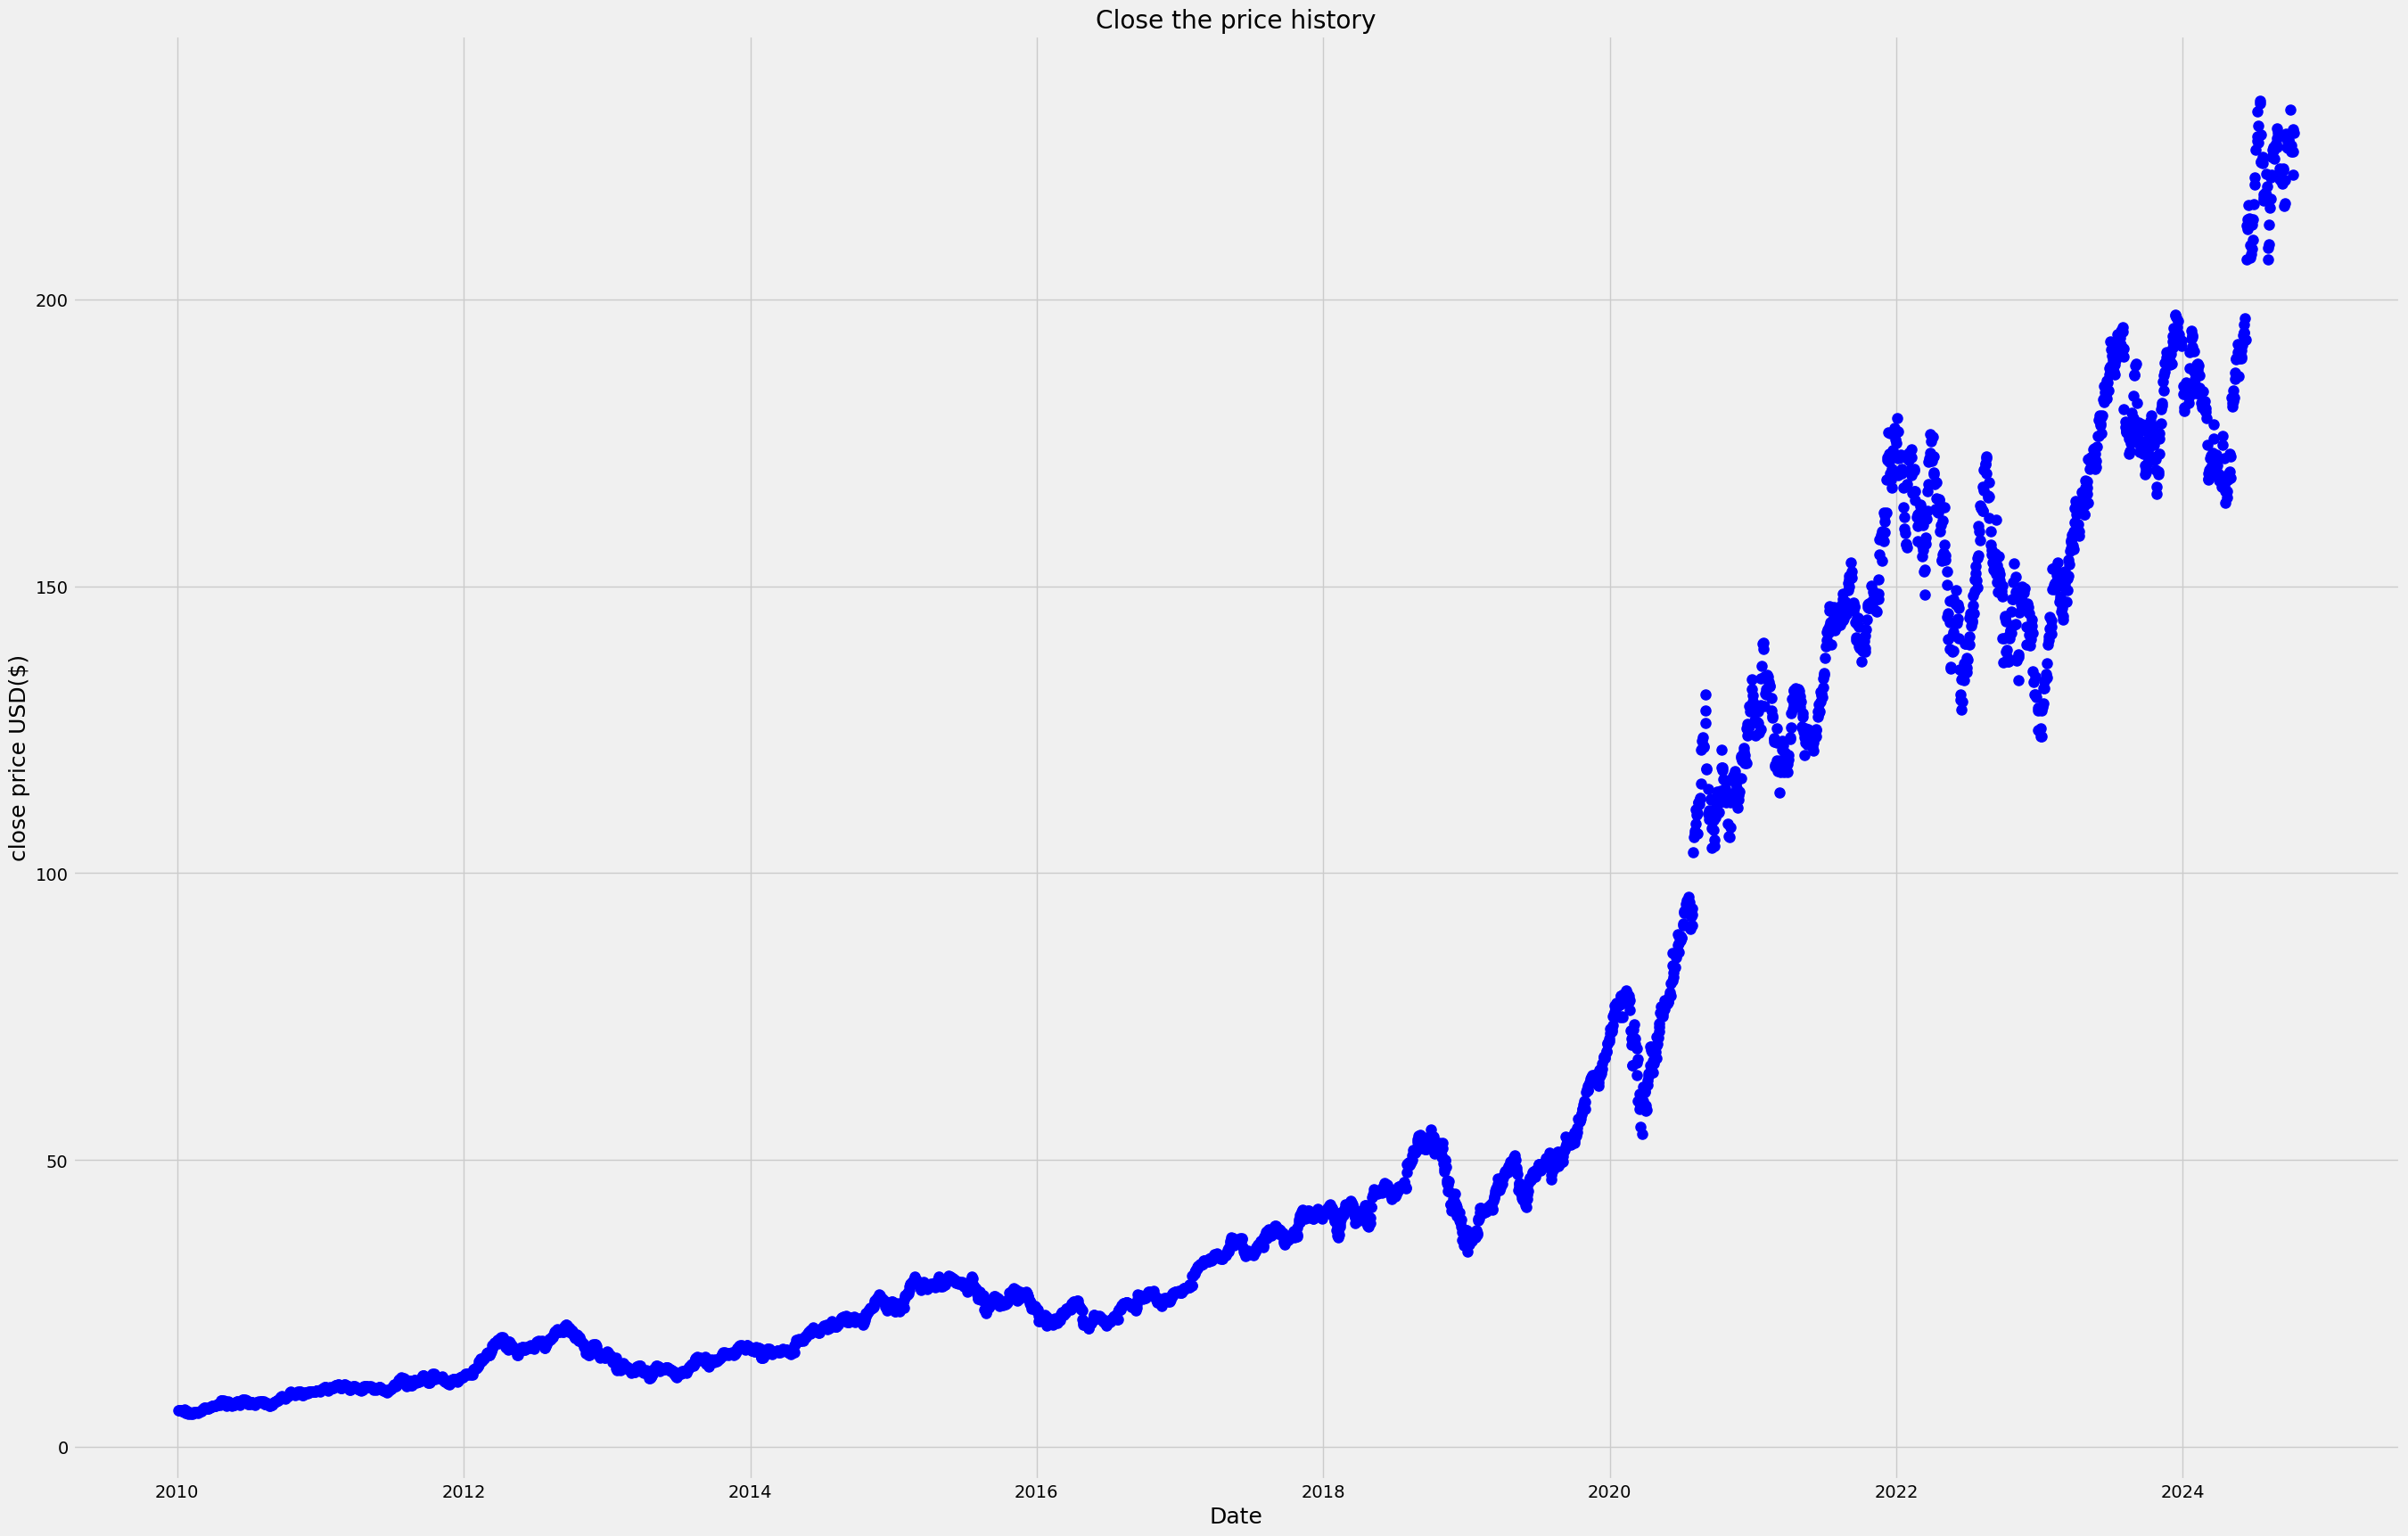

In [141]:
#visualize the closing price history using(bo="blue circle marker")
plt.figure(figsize=(30,20))
plt.title("Close the price history")
plt.plot(stock_data.index,stock_data["Close"],"bo",markersize=8,linewidth=1)
plt.xlabel("Date", fontsize=18)
plt.ylabel("close price USD($)",fontsize=18)
plt.show()

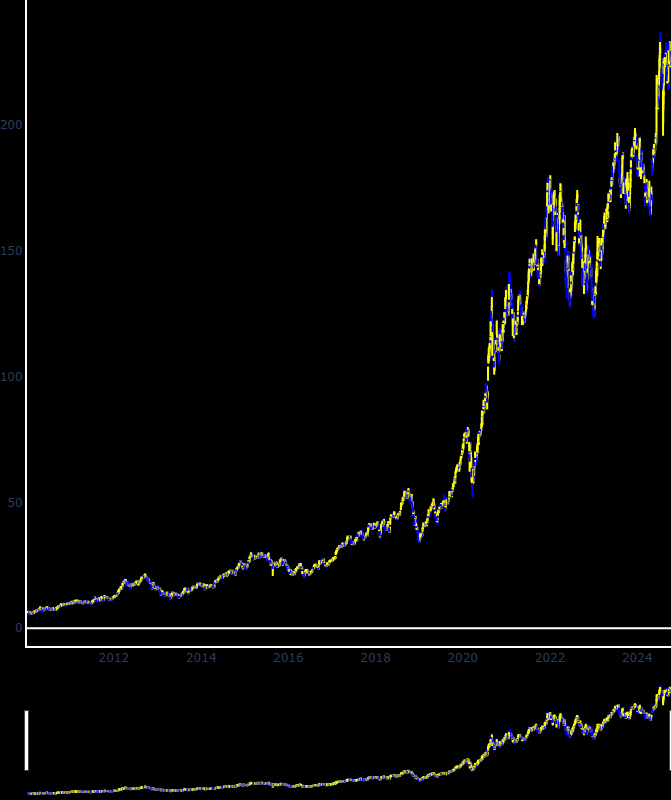

In [355]:
#visualize data using candlestick
import plotly.graph_objects as go
fig=go.Figure(data=go.Candlestick(x=stock_data.index,open=stock_data["Open"],
                                  high=stock_data["High"],
                                  low=stock_data["Low"],
                                  close=stock_data["Close"],
                                 increasing_line_color="yellow",decreasing_line_color="blue"))
#set the background color
fig.update_layout(paper_bgcolor="black",plot_bgcolor="black",margin_l=0,margin_b=0,margin_r=0,margin_t=0,height=800)
fig.update_xaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.update_yaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.show()
#Yellow color-Indicates Increasing values in the dataset stock market
#Blue color-Indicates Decreasing values in the dataset stock market


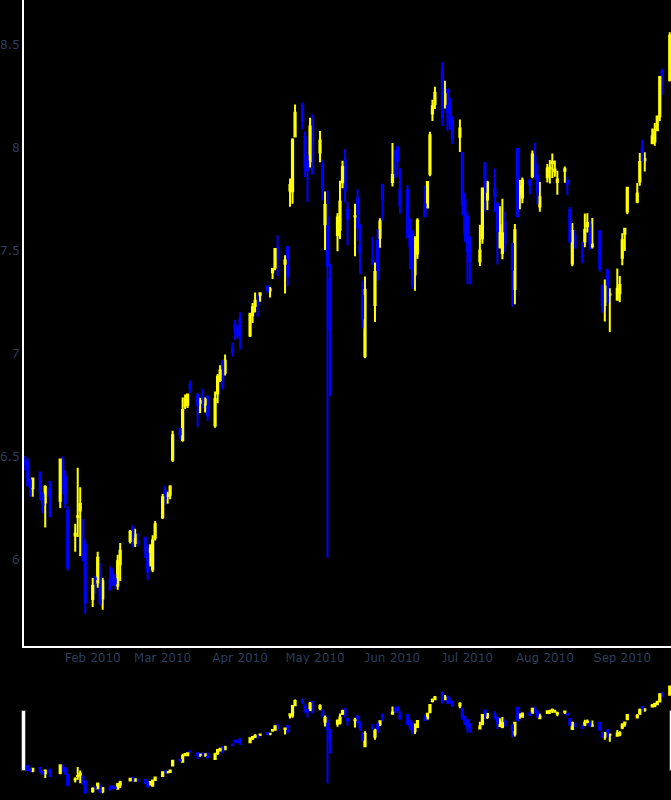

In [357]:
#visualize data using candlestick last six month of data
stock_data1=stock_data[-180:-1]   #fetch the data for last six months

fig=go.Figure(data=go.Candlestick(x=stock_data1.index,open=stock_data1["Open"],
                                  high=stock_data1["High"],
                                  low=stock_data1["Low"],
                                  close=stock_data1["Close"],
                                 increasing_line_color="yellow",decreasing_line_color="blue"))
#set the background color
fig.update_layout(paper_bgcolor="black",plot_bgcolor="black",margin_l=0,margin_b=0,margin_r=0,margin_t=0,height=800)
fig.update_xaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.update_yaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.show()
#Yellow color-Indicates Increasing values in the last six month stock market
#Blue color-Indicates Decreasing values in the last six month stock market
#you can use the slider to zoom the data values


In [359]:
#create support and resistances
supports=stock_data1[stock_data1.Low==stock_data1.Low.rolling(5,center=True).min()].Low
resistances=stock_data1[stock_data1.High==stock_data1.High.rolling(5,center=True).min()].High
levels=pd.concat([supports,resistances])

In [361]:

levels=levels[abs(levels.diff())>1]
#support-low level line- Buyer tend to purchase the stock
#Resistance-High level line -Trader sell the stocks- take the profit rather than risk the price falling back.

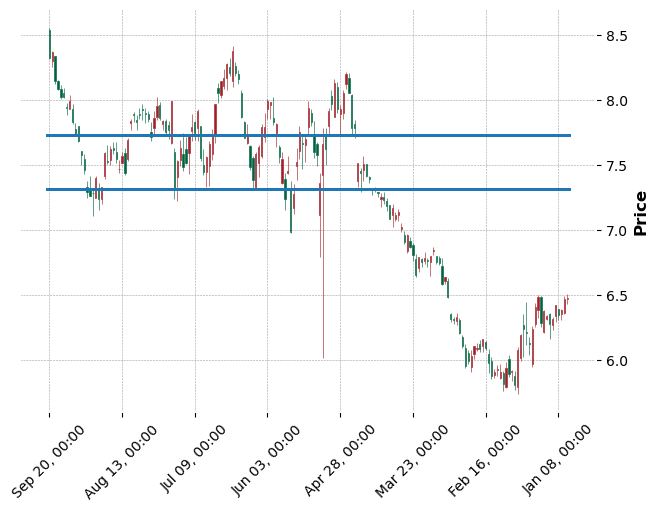

In [363]:
import mplfinance as mpf  # pip nstall mplfinance
mpf.plot(stock_data1,type="candle",hlines=levels.to_list(),style="charles")


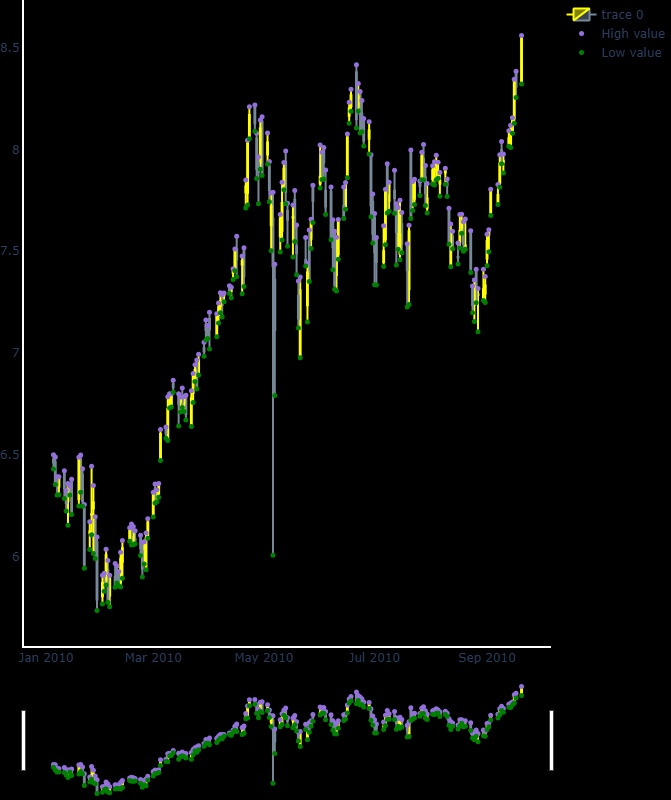

In [365]:
#visualize data using candlestick last six month of data range 6 to 8
stock_data1=stock_data[-180:-1]   #fetch the data for last six months

fig=go.Figure(data=[go.Candlestick(x=stock_data1.index,open=stock_data1["Open"],
                                  high=stock_data1["High"],
                                  low=stock_data1["Low"],
                                  close=stock_data1["Close"],
                                 increasing_line_color="yellow",decreasing_line_color="lightslategray"),
                         go.Scatter(x=stock_data1.index,y=stock_data1.High,mode="markers",marker=dict(size=5,color="MediumPurple"),name="High value"),
                           go.Scatter(x=stock_data1.index,y=stock_data1.Low,mode="markers",marker=dict(size=5,color="green"),name="Low value")] )
#set the background color
fig.update_layout(paper_bgcolor="black",plot_bgcolor="black",margin_l=0,margin_b=0,margin_r=0,margin_t=0,width=1200,height=800)
fig.update_xaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.update_yaxes(showline=True,linewidth=2,linecolor="white",gridcolor="black")
fig.show()

# Purple color-Indicates High values in the last six month stock market
#Green color-Indicates Low values in the last six month stock market
#Yellow color-Indicates Increasing values in the last six month stock market
#Grey color-Indicates Decreasing values in the last six month stock market


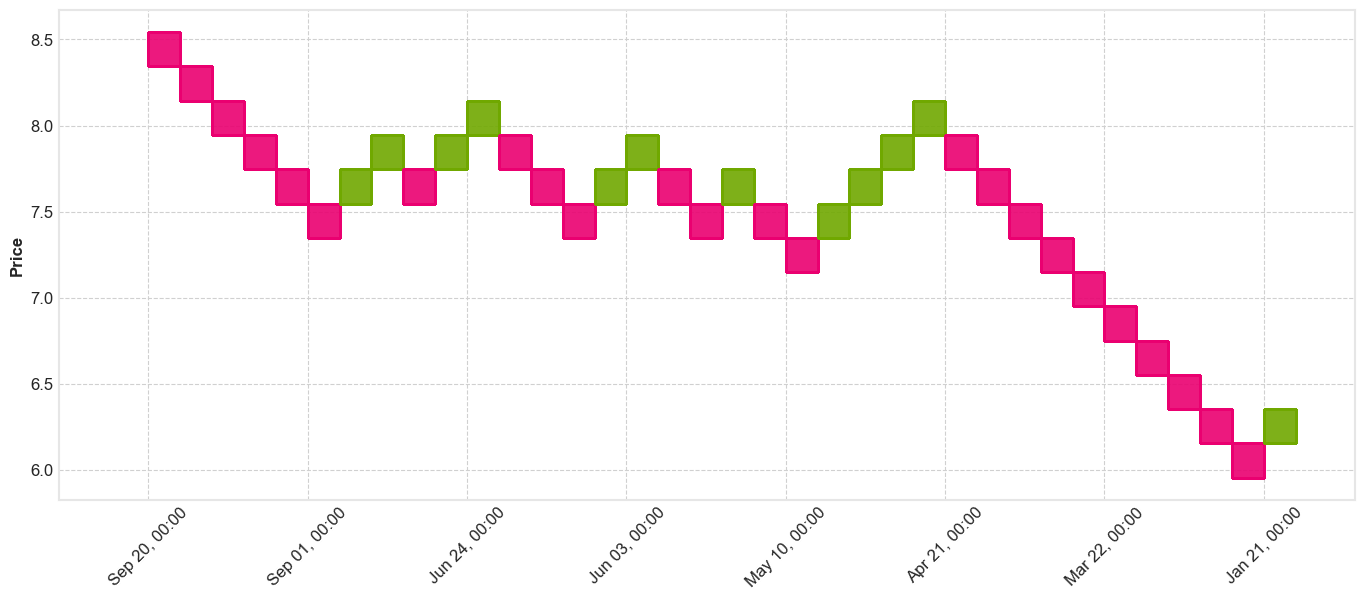

In [371]:
#ranko chart 
#plot based on price
#Green bricks significance uptrend
#Pink bricks significance downtrend
mpf.plot(stock_data1,type="renko",style="binance",figsize=(18,7))


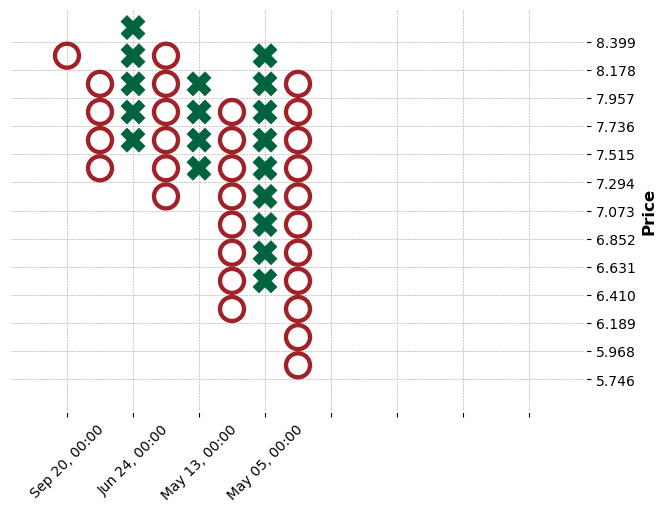

In [373]:
#plot pnf (point and figure)chart
#It denotes price against direction
#x indicates prices rises
#o indicates prices falls
import warnings
warnings.filterwarnings('ignore')
mpf.plot(stock_data1,type="pnf",style="charles")

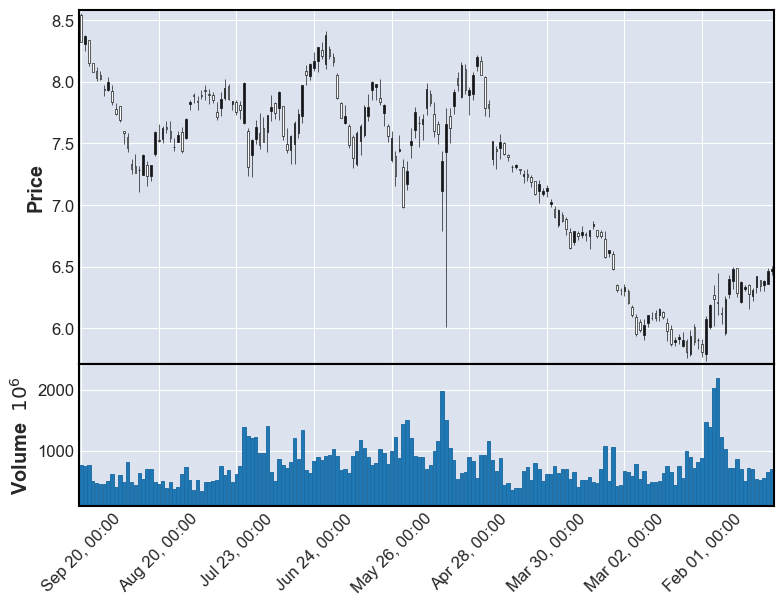

In [375]:
#adding trading volume
mpf.plot(stock_data1,type="candle",volume=True,tight_layout=True)

In [ ]:
#in Jun 03, the volume increses but the price decreases
#In Apr 28, there is volume decreases but thr price increases when compared to jun 03.

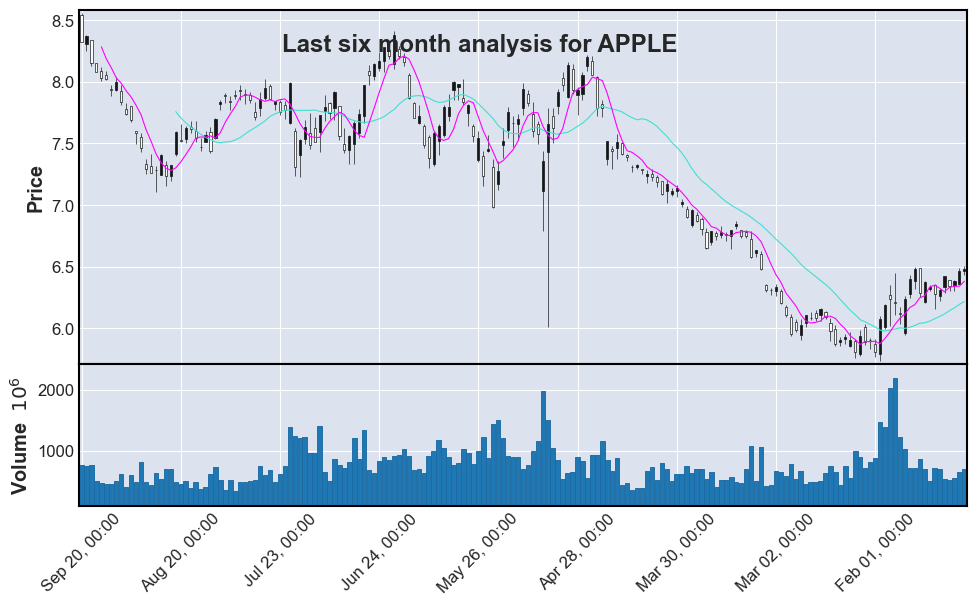

In [377]:
#Adding moving average
#pink color shows friday(5th day) of each week average
#blue color shows every 20th day of month average
mpf.plot(stock_data1,type="candle",volume=True,mav=(20,5),title="Last six month analysis for APPLE",tight_layout=True,figratio=(16,9))

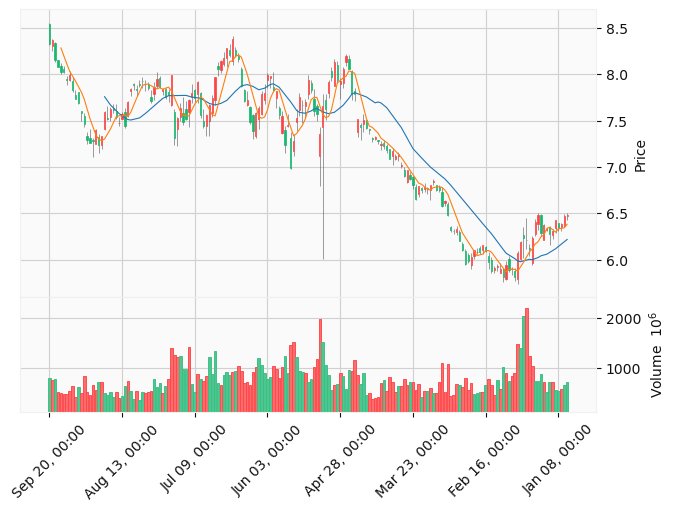

In [379]:
#using custom style
mpf.plot(stock_data1,type="candle",volume=True,mav=(20,5),style="yahoo")

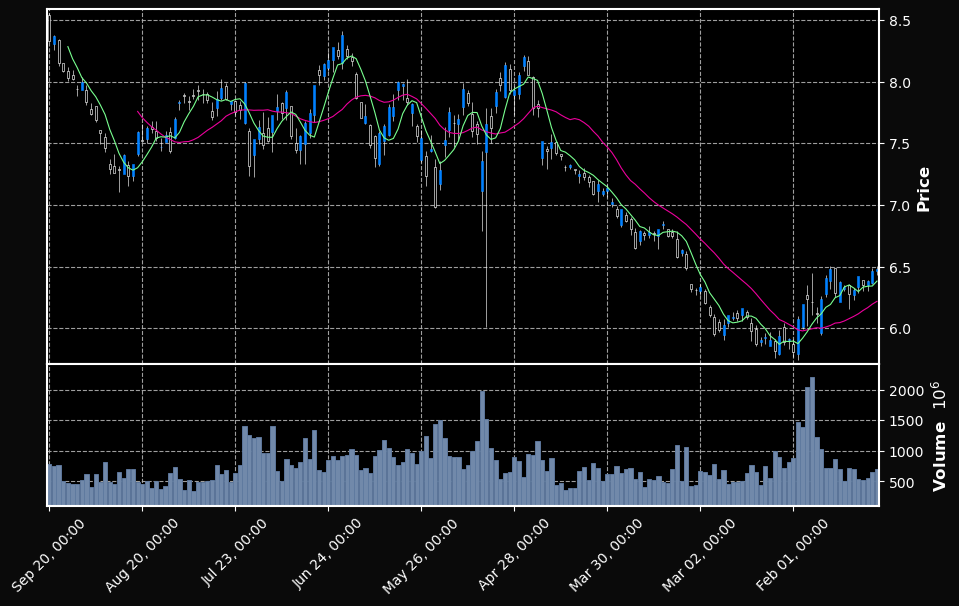

In [381]:
mpf.plot(stock_data1,type="candle",volume=True,mav=(20,5),figratio=(10,6),tight_layout=True,style="mike")